<a href="https://colab.research.google.com/github/ArthurAJO/aerospace_engineering_ai_activities/blob/main/secondList/Real_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Arthur Augusto J de Oliveira\
Matrícula: 2016021645

**Link do notebook deste Google Colab: https://colab.research.google.com/drive/1prUDp3wuNmMWXF_S70wNEyvu2WpMA6DX#scrollTo=Y_tu1qJKL4KP**



## 2. Classificação de dados reais

Após o desenvolvimento dos modelos de classificação no exercício anterior,
eles podem ser utilizados para a classificação de dados reais. Muitos desses
dados são provenientes de repositórios públicos e podem ser utilizados para
serem aplicados nos modelos desenvolvidos. Um exemplo de repositório
muito utilizado é o da Universidade da California, Irvine (UCI), encontrado
no link abaixo.

Repositório UCI: https://archive.ics.uci.edu/ml/datasets.php

O aluno que tiver interesse pode escolher um dos problemas de classificação encontrado no banco de dados da UCI, porém, para simplificação
será disponibilizado um banco de dados no moodle para aplicação nos modelos.
Assim como no exercício 1, devem ser utilizadas as seguintes arquiteturas
para resolução dos problemas:

* Perceptron Simples
* ELM
* Perceptron de múltiplas camadas

## Inicialização

Imports e comunicação com o repositório do GitHub que contém o banco de dados para os programas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

!git clone https://github.com/ArthurAJO/aerospace_engineering_ai_activities.git

#Funções das arquiteturas de rede.

### Perceptron Simples

Abaixo são construídas as funções para a execução da arquitetura de rede Perceptron Simples.

In [ ]:
def trainPerceptron(x,y,eta,tol,max_epocas,par):
    if par == 1:
        bias = np.ones((x.shape[0],1))
        x = np.concatenate((x,bias), axis = 1)
        
    N_perceptron = x.shape[0]
    n_perceptron = x.shape[1]
    w = np.random.rand(n_perceptron) - 0.5 
    w = np.resize(w,(w.shape[0],1))
    n_epocas = 0
    erro_epoca = 1 + tol
    evec = erro_epoca * np.ones(max_epocas)
    
    while erro_epoca > tol and n_epocas < max_epocas - 1:
        e_i2 = 0
        xseq = np.arange(N_perceptron)
        np.random.shuffle(xseq)
        
        for i in range(N_perceptron):
            i_rand = xseq[i]
            yhat_i = np.multiply(np.dot(x[i_rand],w) >= 0, 1)
            e_i = y[i_rand] - yhat_i
            dw = eta * e_i * x[i_rand]
            dw = np.resize(dw,(dw.shape[0],1))
            w = w + dw
            e_i2 = e_i2 + e_i * e_i
        
        n_epocas += 1
        evec[n_epocas] = e_i2/N_perceptron
        erro_epoca = evec[n_epocas]
        
    return w, evec[0:n_epocas]

def yPerceptron(x, w, par):
    if par == 0:
        x = np.concatenate((x,np.ones((x.shape[0],1))), axis = 1)

    w = np.resize(w, (x.shape[1],1))
    y_eval = np.dot(x,w)
    class_eval = np.squeeze(np.multiply(np.dot(x,w) >= 0, 1))
    
    return y_eval, class_eval

### ELM

Abaixo são construídas as funções para a execução da arquitetura de rede ELM.

In [ ]:
def trainELMPseudoInverse(x, y, p):
    n = np.shape(x)[1]
    z = np.random.rand(n, p) - 0.5
    z = np.resize(z, (z.shape[0], z.shape[1]))

    for _ in range(maxEpocas):
        h = np.tanh(np.dot(x, z))
        w = np.dot(np.linalg.pinv(h), y)

    return z,w

def yELM(z, w, test):
    w = np.resize(w, (w.shape[0], 1))
    classified_H = np.tanh(np.dot(test, z))
    classified = np.sign(np.tanh(np.dot(classified_H, w)))
    return classified
    
def errorCalc(yEval, actualClass):
    error = np.absolute(actualClass - yEval)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = (yEval - actualClass)**2
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

### Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Abaixo são construídas as funções para a execução da arquitetura de rede Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron).

In [ ]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1] 
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec
    
def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

def errorCalc(yEval, actualClass):
    error = np.multiply(actualClass != yEval, 1)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = np.dot(error, error.T)
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

##1.2.1 Conexão com banco de dados

In [ ]:
dataFrameXOR = pd.read_csv('aerospace_engineering_ai_activities/secondList/dataset/heart')
dataFrameXOR = shuffle(dataFrameXOR)

Preparação dos dados: 70% treino e 30% teste.

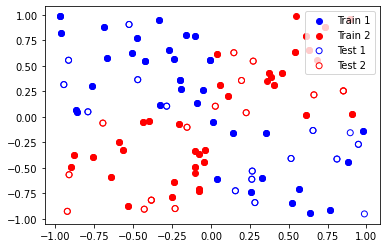

In [ ]:
N = len(dataFrameXOR)

# 70% for train and 30% for test
trainSize = int(0.7*N)
testSize = N - trainSize

trainData = dataFrameXOR.head(trainSize)
testDate = dataFrameXOR.tail(testSize)

#Data train
x1_train = trainData[trainData['classes'] == 1]['x.1'].to_numpy()
x1_train = np.resize(x1_train, (trainSize, 1))
y1_train = trainData[trainData['classes'] == 1]['x.2'].to_numpy()
y1_train = np.resize(y1_train, (trainSize, 1))

x2_train = trainData[trainData['classes'] == 2]['x.1'].to_numpy()
x2_train = np.resize(x2_train, (trainSize, 1))
y2_train = trainData[trainData['classes'] == 2]['x.2'].to_numpy()
y2_train = np.resize(y2_train, (trainSize, 1))

#Data test
x1_test = testDate[testDate['classes'] == 1]['x.1'].to_numpy()
x1_test = np.resize(x1_test, (testSize, 1))
y1_test = testDate[testDate['classes'] == 1]['x.2'].to_numpy()
y1_test = np.resize(y1_test, (testSize, 1))

x2_test = testDate[testDate['classes'] == 2]['x.1'].to_numpy()
x2_test = np.resize(x2_test, (testSize, 1))
y2_test = testDate[testDate['classes'] == 2]['x.2'].to_numpy()
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()